# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
import numpy as np
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

pd.__version__

C:\Users\Pranav\anaconda3\envs\pyvizenv\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)



Bad key "text.kerning_factor" on line 4 in
C:\Users\Pranav\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


'1.0.5'

In [2]:
np.__version__

'1.20.1'

In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)


## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [6]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)

grouped = to_data.groupby("year").sum()
grouped

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  average_house_value  shelter_costs_owned  \
year                                                          
2001         3040             40583604               118563   
2006         1335             59368353               184352   
2011         2165             74259461               202750   
2016         2845             92969566               246584   

      shelter_costs_rented  
year                        
2001                152031  
2006                129558  
2011                142771  
2016                175885

In [7]:
# Save the dataframe as a csv file

grouped.to_csv("Data/toronto_neighbourhoods_census_data_modify.csv")

In [8]:
# Helper create_bar_chart function

def create_bar_chart(data, title, color):
    bar_chart = data.plot.bar(title=title, rot=90, color=color, figsize=(15,10))
    return(bar_chart)



                               2001
single_detached_house        300930
apartment_five_storeys_plus  355015
movable_dwelling                 75
semi_detached_house           90995
row_house                     52355
duplex                        23785
apartment_five_storeys_less  116900
other_house                    3040


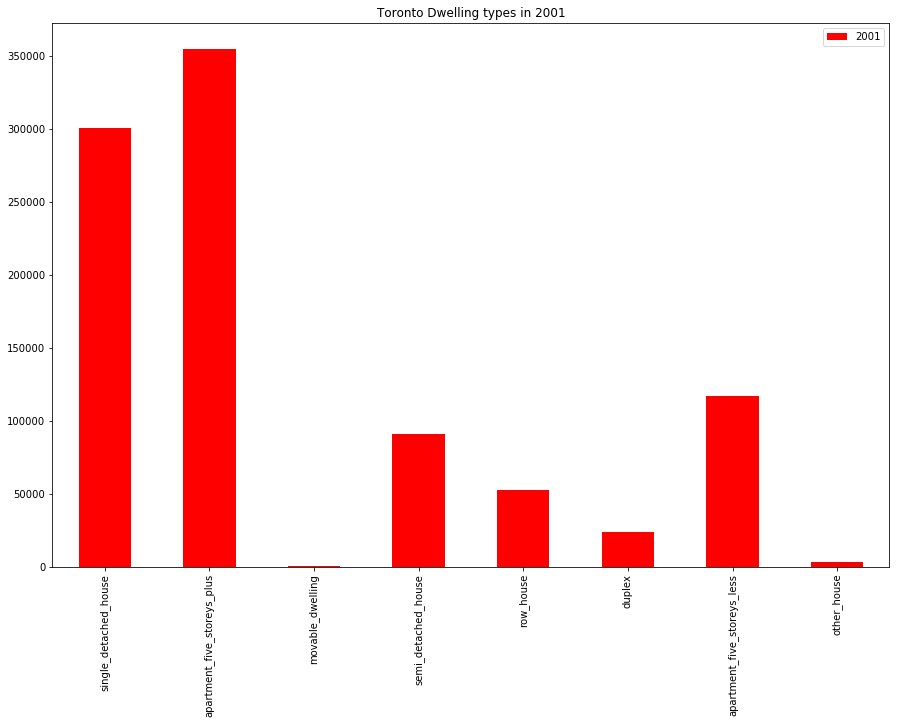

In [9]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001 by calling the function "create_bar_char"

grouped_dwel = pd.DataFrame(grouped.iloc[0,0:8])
print(grouped_dwel)

create_bar_chart(grouped_dwel, "Toronto Dwelling types in 2001", "red")


                               2006
single_detached_house        266860
apartment_five_storeys_plus  379400
movable_dwelling                165
semi_detached_house           69430
row_house                     54690
duplex                        44095
apartment_five_storeys_less  162850
other_house                    1335


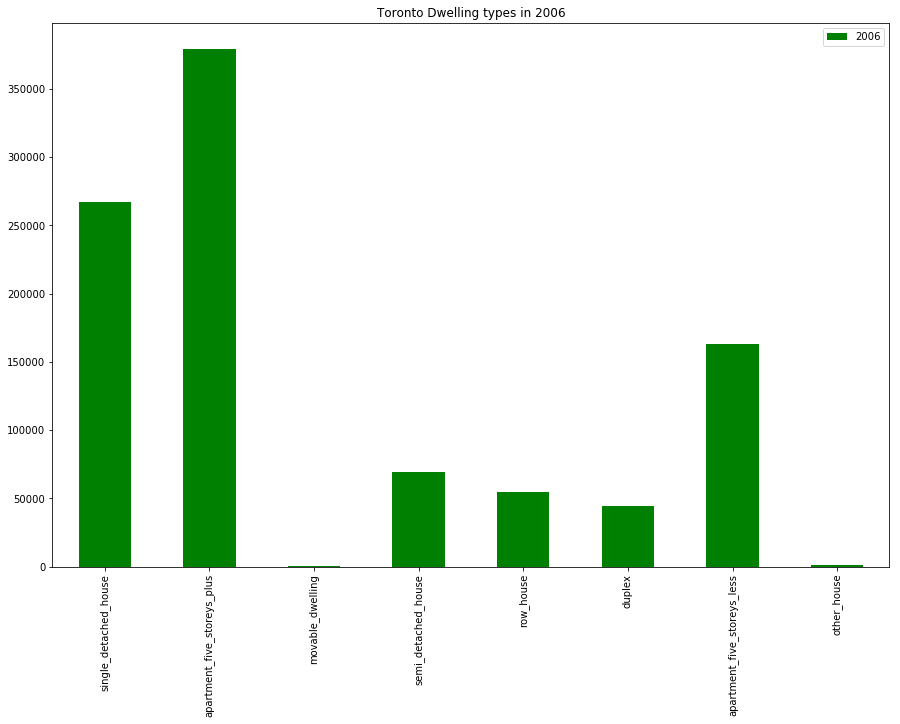

In [10]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2006 by calling the function "create_bar_char"

grouped_dwe2 = pd.DataFrame(grouped.iloc[1,0:8])
print(grouped_dwe2)

create_bar_chart(grouped_dwe2, "Toronto Dwelling types in 2006", "green")

                               2011
single_detached_house        274940
apartment_five_storeys_plus  429220
movable_dwelling                100
semi_detached_house           72480
row_house                     60355
duplex                        44750
apartment_five_storeys_less  163895
other_house                    2165


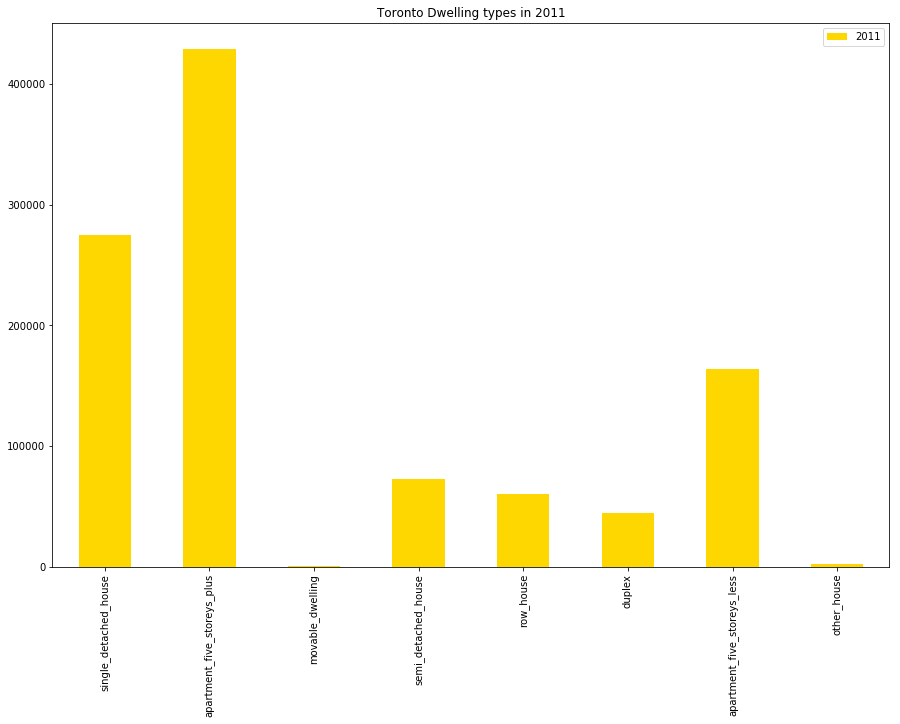

In [11]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2011 by calling the function "create_bar_char"

grouped_dwe3 = pd.DataFrame(grouped.iloc[2,0:8])
print(grouped_dwe3)

create_bar_chart(grouped_dwe3, "Toronto Dwelling types in 2011", "gold")


                               2016
single_detached_house        269680
apartment_five_storeys_plus  493270
movable_dwelling                 95
semi_detached_house           71200
row_house                     61565
duplex                        48585
apartment_five_storeys_less  165575
other_house                    2845


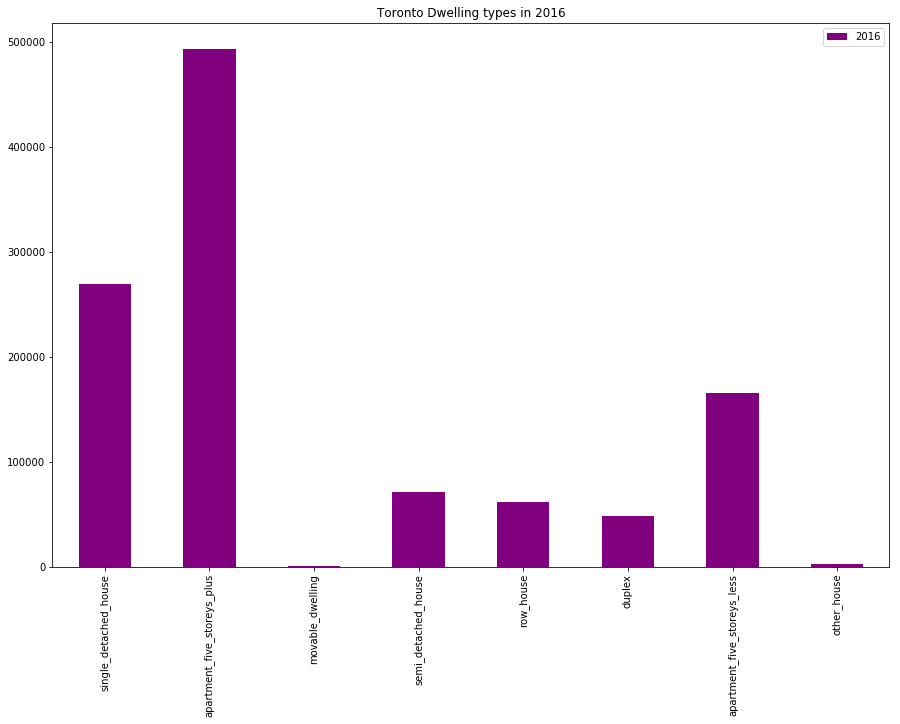

In [12]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2011 by calling the function "create_bar_char"

grouped_dwe4 = pd.DataFrame(grouped.iloc[3,0:8])
print(grouped_dwe4)

create_bar_chart(grouped_dwe4, "Toronto Dwelling types in 2016", "purple")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [13]:
# Calculate the average monthly shelter costs for owned and rented dwellings
#average costs grouped by year

grouped_mean = to_data.groupby("year").mean()
grouped_mean


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001            2149.500000                  2535.821429          0.535714   
2006            1906.142857                  2710.000000          1.178571   
2011            1963.857143                  3065.857143          0.714286   
2016            1926.285714                  3523.357143          0.678571   

      semi_detached_house   row_house      duplex  \
year                                                
2001           649.964286  373.964286  169.892857   
2006           495.928571  390.642857  314.964286   
2011           517.714286  431.107143  319.642857   
2016           508.571429  439.750000  347.035714   

      apartment_five_storeys_less  other_house  average_house_value  \
year                                                                  
2001                   835.000000    21.714286        289882.885714   
2006                  1163.214286     9.535714        424059.664286   
2011                  1170.678571    15.464286        530424.721429   
2016                  1182.678571    20.321429        664068.328571   

      shelter_costs_owned  shelter_costs_rented  
year                                             
2001           846.878571           1085.935714  
2006          1316.800000            925.414286  
2011          1448.214286           1019.792857  
2016          1761.314286           1256.321429

In [14]:
#average monthly shelter costs for owned and rented dwellings

shelter_cost_grp = pd.DataFrame(grouped_mean.iloc[:,9:11])
shelter_cost_grp


shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [15]:
# Helper create_line_chart function
def create_line_chart(data, title, color):
    line_chart = data.plot.line(title=title, color=color, figsize=(15,10))
    return(line_chart)

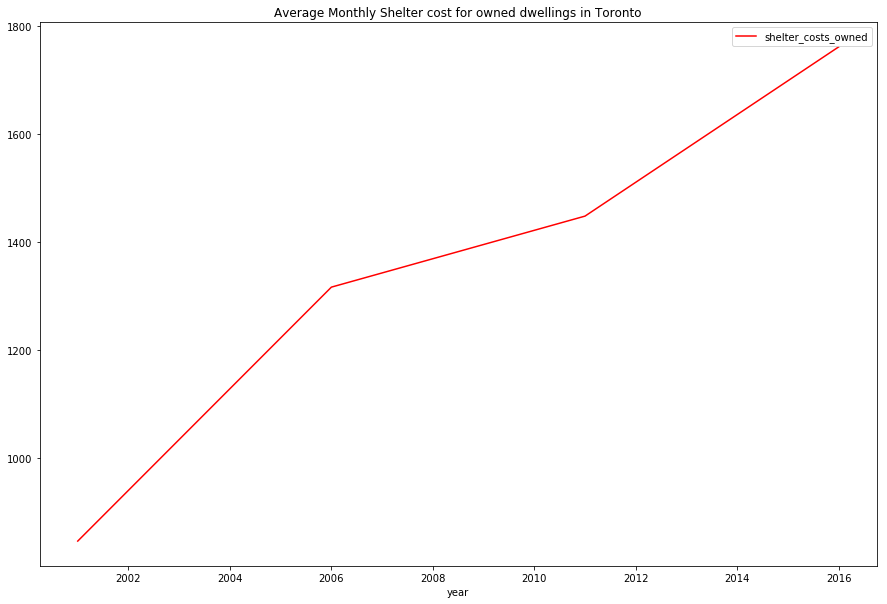

In [16]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings by calling the function "create_line_char"
shelter_cost_own=pd.DataFrame(shelter_cost_grp.iloc[:,0])

create_line_chart(
    shelter_cost_own,
    "Average Monthly Shelter cost for owned dwellings in Toronto",
    "Red"
)

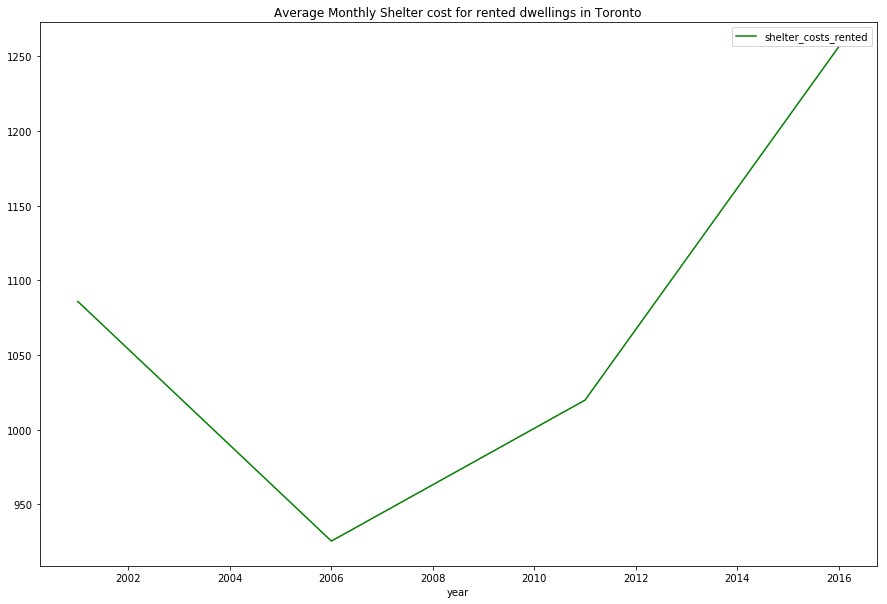

In [17]:
# Line chart for rented dwellings by calling the function "create_line_char"
shelter_cost_rent = pd.DataFrame(shelter_cost_grp.iloc[:,1])

create_line_chart(
    shelter_cost_rent,
    "Average Monthly Shelter cost for rented dwellings in Toronto",
    "Green"
)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [18]:
# Calculate the average house value per year

avg_hou_val = pd.DataFrame(grouped_mean.iloc[:,8])
avg_hou_val

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

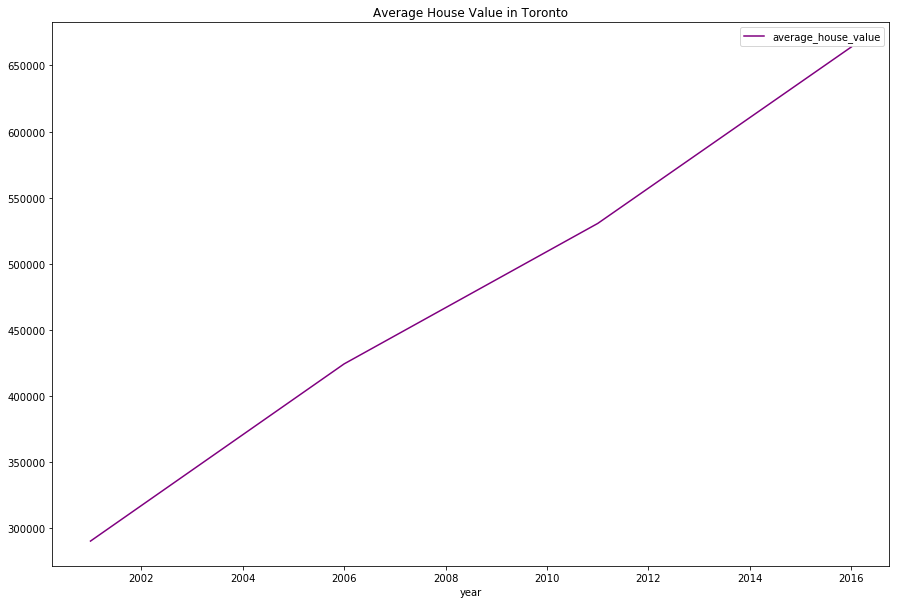

In [19]:
# Plot the average house value per year as a line chart
avg_hou_val.plot.line(title="Average House Value in Toronto", color="purple", figsize=(15,10))

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [20]:
# Create a new DataFrame with the mean house values by neighbourhood per year

neighbourhood_data = pd.DataFrame(to_data.groupby(["year","neighbourhood"]).mean())
neighbourhood_data


single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                                3715   
     Agincourt South-Malvern West                   3250   
     Alderwood                                      3175   
     Annex                                          1060   
     Banbury-Don Mills                              3615   
...                                                  ...   
2016 Wychwood                                        920   
     Yonge-Eglinton                                 1400   
     Yonge-St.Clair                                  520   
     York University Heights                        1235   
     Yorkdale-Glen Park                             2165   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                      1480   
     Agincourt South-Malvern West                         1835   
     Alderwood                                             315   
     Annex                                                6090   
     Banbury-Don Mills                                    4465   
...                                                        ...   
2016 Wychwood                                             1295   
     Yonge-Eglinton                                       1995   
     Yonge-St.Clair                                       4315   
     York University Heights                              5505   
     Yorkdale-Glen Park                                   1185   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                              0                 1055   
     Agincourt South-Malvern West                 0                  545   
     Alderwood                                    0                  470   
     Annex                                        5                 1980   
     Banbury-Don Mills                            0                  240   
...                                             ...                  ...   
2016 Wychwood                                     0                  880   
     Yonge-Eglinton                               0                  465   
     Yonge-St.Clair                               0                  450   
     York University Heights                      0                 1360   
     Yorkdale-Glen Park                           0                   80   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                    1295     195   
     Agincourt South-Malvern West        455     105   
     Alderwood                            50     185   
     Annex                               605     275   
     Banbury-Don Mills                   380      15   
...                                      ...     ...   
2016 Wychwood                            290     395   
     Yonge-Eglinton                       60     310   
     Yonge-St.Clair                      220     130   
     York University Heights             775     280   
     Yorkdale-Glen Park                  600     465   

                                   apartment_five_storeys_less  other_house  \
year neighbourhood                                                            
2001 Agincourt North                                       185            5   
     Agincourt South-Malvern West                          425            0   
     Alderwood                                             370            0   
     Annex                                                3710          165   
     Banbury-Don Mills                                    1360            0   
...                                                        ...          ...   
2016 Wychwood                                

In [21]:
# extracting average house values by neighbourhood per year from dataframe
neigh_hou_val = pd.DataFrame(neighbourhood_data.iloc[:,8])
neigh_hou_val.head()

average_house_value
year neighbourhood                                    
2001 Agincourt North                            200388
     Agincourt South-Malvern West               203047
     Alderwood                                  259998
     Annex                                      453850
     Banbury-Don Mills                          371864

In [22]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neigh_hou_val.hvplot(groupby='neighbourhood', height=500).opts(yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [23]:
# Fetch the data of all dwelling types per year
dwellin_by_year = to_data.iloc[:,0:9]
dwellin_by_year.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  
year                                                               
2001       1295     195                          185            5  
2001        455     105                          425            0  
2001         50     185                          370            0  
2001        605     275                         3710          165  
2001        380      15                         1360            0

In [24]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
plot_dwel = dwellin_by_year.hvplot.bar(groupby='neighbourhood', rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot_dwel

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [25]:
# Getting the data from the top 10 expensive neighbourhoods
house_val_by_neig = to_data.groupby("neighbourhood").mean()
avg_house_val_by_neig = pd.DataFrame(house_val_by_neig.iloc[:,8])
avg_house_val_by_neig


average_house_value
neighbourhood                                    
Agincourt North                         329811.50
Agincourt South-Malvern West            334189.00
Alderwood                               427922.50
Annex                                   746977.00
Banbury-Don Mills                       612039.00
...                                           ...
Wychwood                                565976.50
Yonge-Eglinton                          809745.75
Yonge-St.Clair                          813220.25
York University Heights                 305899.50
Yorkdale-Glen Park                      430861.25

[140 rows x 1 columns]

In [26]:
# sort house value in decending order
sorted_avg_house_val = avg_house_val_by_neig.sort_values(by=["average_house_value"], ascending=False)
sorted_avg_house_val

average_house_value
neighbourhood                                         
Bridle Path-Sunnybrook-York Mills           1526485.75
Forest Hill South                           1195992.50
Lawrence Park South                         1094027.75
Rosedale-Moore Park                         1093640.00
St.Andrew-Windfields                         999107.00
...                                                ...
Malvern                                      256880.25
Thorncliffe Park                             255264.75
Mount Olive-Silverstone-Jamestown            253182.25
Taylor-Massey                                239414.00
Flemingdon Park                              207799.00

[140 rows x 1 columns]

In [27]:
#Top 10 neighbourhood

top_10 = sorted_avg_house_val.head(10)
top_10

average_house_value
neighbourhood                                         
Bridle Path-Sunnybrook-York Mills           1526485.75
Forest Hill South                           1195992.50
Lawrence Park South                         1094027.75
Rosedale-Moore Park                         1093640.00
St.Andrew-Windfields                         999107.00
Casa Loma                                    981064.25
Bedford Park-Nortown                         930415.25
Forest Hill North                            851680.50
Kingsway South                               843234.25
Yonge-St.Clair                               813220.25

In [28]:
# Plotting the data from the top 10 expensive neighbourhoods

top_10.hvplot.bar(height=500,rot=90,color="green").opts(yformatter="%.0f")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [29]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path, index_col="neighbourhood")
df_neighbourhood_locations.head()


lat        lon
neighbourhood                                     
Agincourt North               43.805441 -79.266712
Agincourt South-Malvern West  43.788658 -79.265612
Alderwood                     43.604937 -79.541611
Annex                         43.671585 -79.404001
Banbury-Don Mills             43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [30]:
# Calculate the mean values for each neighborhood
avg_house_val_by_neig

average_house_value
neighbourhood                                    
Agincourt North                         329811.50
Agincourt South-Malvern West            334189.00
Alderwood                               427922.50
Annex                                   746977.00
Banbury-Don Mills                       612039.00
...                                           ...
Wychwood                                565976.50
Yonge-Eglinton                          809745.75
Yonge-St.Clair                          813220.25
York University Heights                 305899.50
Yorkdale-Glen Park                      430861.25

[140 rows x 1 columns]

In [31]:
# Join the average values with the neighbourhood locations
concat_data = pd.concat([df_neighbourhood_locations , avg_house_val_by_neig], axis =1)
concat_data.reset_index(inplace=True)
concat_data

neighbourhood        lat        lon  average_house_value
0                 Agincourt North  43.805441 -79.266712            329811.50
1    Agincourt South-Malvern West  43.788658 -79.265612            334189.00
2                       Alderwood  43.604937 -79.541611            427922.50
3                           Annex  43.671585 -79.404001            746977.00
4               Banbury-Don Mills  43.737657 -79.349718            612039.00
..                            ...        ...        ...                  ...
135                      Wychwood  43.676919 -79.425515            565976.50
136                Yonge-Eglinton  43.704689 -79.403590            809745.75
137                Yonge-St.Clair  43.687859 -79.397871            813220.25
138       York University Heights  43.765736 -79.488883            305899.50
139            Yorkdale-Glen Park  43.714672 -79.457108            430861.25

[140 rows x 4 columns]

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [32]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)


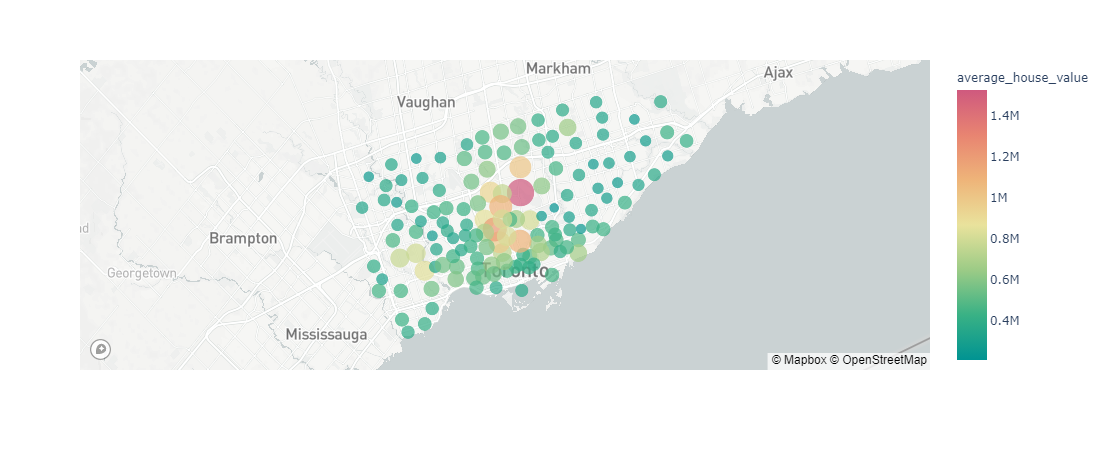

In [45]:
# Create a scatter mapbox to analyze neighbourhood info

map_plot = px.scatter_mapbox(
    concat_data,
    lat = "lat",
    lon = "lon",
    color = "average_house_value",
    size = "average_house_value",
    color_continuous_scale=px.colors.diverging.Temps,
    hover_name = "neighbourhood",
    zoom=9
)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [34]:
# Fetch the data from all expensive neighbourhoods per year.
avg_house_val_by_year = to_data.loc[:,["neighbourhood", "average_house_value"]]
avg_house_val_by_year.reset_index(inplace=True)
avg_house_val_by_year


year                 neighbourhood  average_house_value
0    2001               Agincourt North               200388
1    2001  Agincourt South-Malvern West               203047
2    2001                     Alderwood               259998
3    2001                         Annex               453850
4    2001             Banbury-Don Mills               371864
..    ...                           ...                  ...
555  2016                      Wychwood               787760
556  2016                Yonge-Eglinton              1127052
557  2016                Yonge-St.Clair              1131888
558  2016       York University Heights               425769
559  2016            Yorkdale-Glen Park               599698

[560 rows x 3 columns]

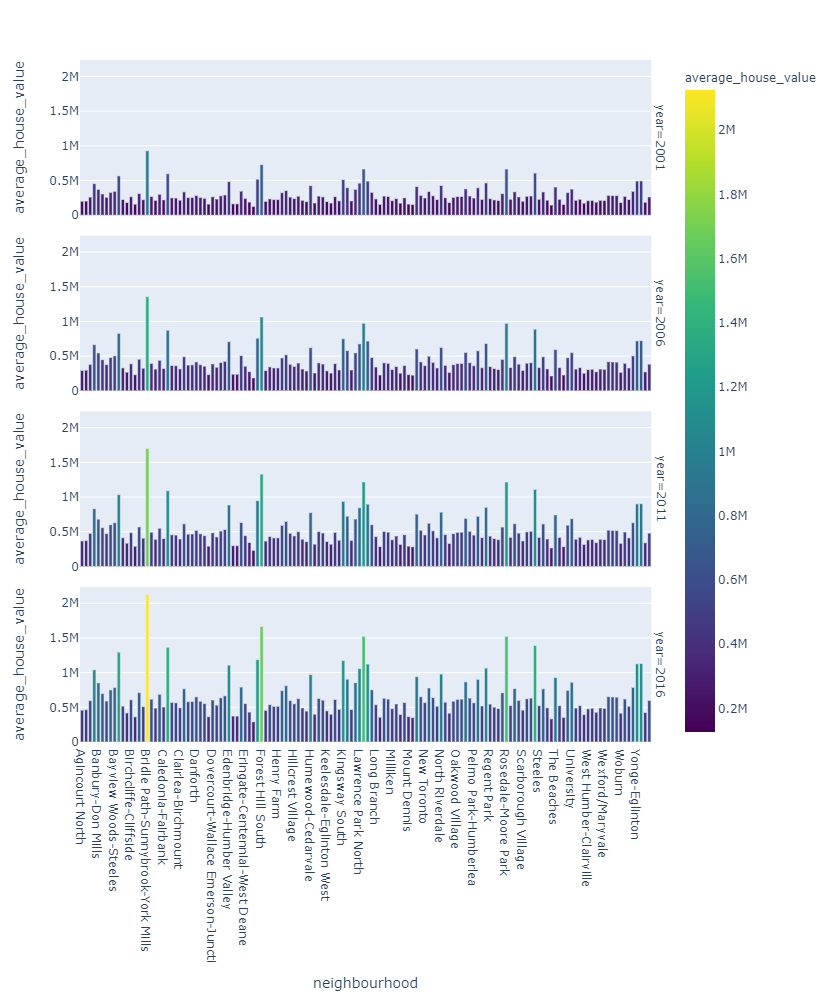

In [35]:
#Creating a bar chart row facet to plot the average house values

plot = px.bar(
    avg_house_val_by_year, 
    x = "neighbourhood", 
    y = "average_house_value", 
    color = "average_house_value", 
    facet_row = "year",
    color_continuous_scale = px.colors.sequential.Viridis,
    height = 1000,
    width = 900,
)
plot.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [36]:
# Fetch the data from all expensive neighbourhoods per year.
top_10

average_house_value
neighbourhood                                         
Bridle Path-Sunnybrook-York Mills           1526485.75
Forest Hill South                           1195992.50
Lawrence Park South                         1094027.75
Rosedale-Moore Park                         1093640.00
St.Andrew-Windfields                         999107.00
Casa Loma                                    981064.25
Bedford Park-Nortown                         930415.25
Forest Hill North                            851680.50
Kingsway South                               843234.25
Yonge-St.Clair                               813220.25

In [37]:
# Extracting all data related to to 10 neighbourhood from to_data file
new_df=[]
new_df = to_data[(to_data["neighbourhood"].str.contains("Bridle Path-Sunnybrook-York Mills"))
                 | (to_data["neighbourhood"].str.contains("Forest Hill South"))
                 | (to_data["neighbourhood"].str.contains("Lawrence Park South"))
                 | (to_data["neighbourhood"].str.contains("Rosedale-Moore Park"))
                 |(to_data["neighbourhood"].str.contains("St.Andrew-Windfields"))
                 |(to_data["neighbourhood"].str.contains("Casa Loma"))
                 |(to_data["neighbourhood"].str.contains("Bedford Park-Nortown"))
                 |(to_data["neighbourhood"].str.contains("Forest Hill North"))
                 |(to_data["neighbourhood"].str.contains("Kingsway South"))
                 |(to_data["neighbourhood"].str.contains("Yonge-St.Clair"))
                 
       ]

new_df.head()


neighbourhood  single_detached_house  \
year                                                             
2001               Bedford Park-Nortown                   4985   
2001  Bridle Path-Sunnybrook-York Mills                   2275   
2001                          Casa Loma                   1035   
2001                  Forest Hill North                   1565   
2001                  Forest Hill South                   1815   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         2080                 0                   45   
2001                          110                 0                   25   
2001                         1700                 0                  415   
2001                         3380                 0                   10   
2001                         2440                 5                   65   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001         40     210                         1235           15   
2001         15      10                           20            0   
2001        190     185                         1090            5   
2001          0       0                          485            5   
2001         45      85                         1010           15   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               565304                  933                  1491  
2001               927466                 1983                  1790  
2001               596077                 1241                  1500  
2001               517466                  940                  1428  
2001               726664                 1001                  1469

In [38]:
# extracting shelter cost owned for the top 10 neighbourhood

new_df_cost = new_df.loc[:,['neighbourhood','shelter_costs_owned']]
new_df_cost.reset_index(inplace=True)
new_df_cost.head()


year                      neighbourhood  shelter_costs_owned
0  2001               Bedford Park-Nortown                  933
1  2001  Bridle Path-Sunnybrook-York Mills                 1983
2  2001                          Casa Loma                 1241
3  2001                  Forest Hill North                  940
4  2001                  Forest Hill South                 1001

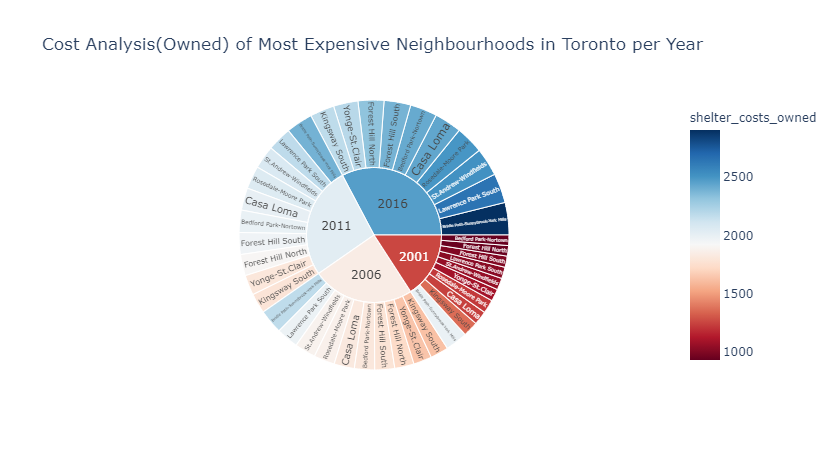

In [43]:
# Create the sunburst chart for Top 10 neighbourhood

fig = px.sunburst(new_df_cost, 
                  path=['year','neighbourhood'], 
                  values='shelter_costs_owned',
                  color='shelter_costs_owned', 
                  title = "Cost Analysis(Owned) of Most Expensive Neighbourhoods in Toronto per Year",
                  color_continuous_scale='RdBu',
                  
                 )
fig.show()

In [40]:
# extracting shelter cost owned for the top 10 neighbourhood

new_df_cost_rent = new_df.loc[:,['neighbourhood','shelter_costs_rented']]
new_df_cost_rent.reset_index(inplace=True)
new_df_cost_rent.head()


year                      neighbourhood  shelter_costs_rented
0  2001               Bedford Park-Nortown                  1491
1  2001  Bridle Path-Sunnybrook-York Mills                  1790
2  2001                          Casa Loma                  1500
3  2001                  Forest Hill North                  1428
4  2001                  Forest Hill South                  1469

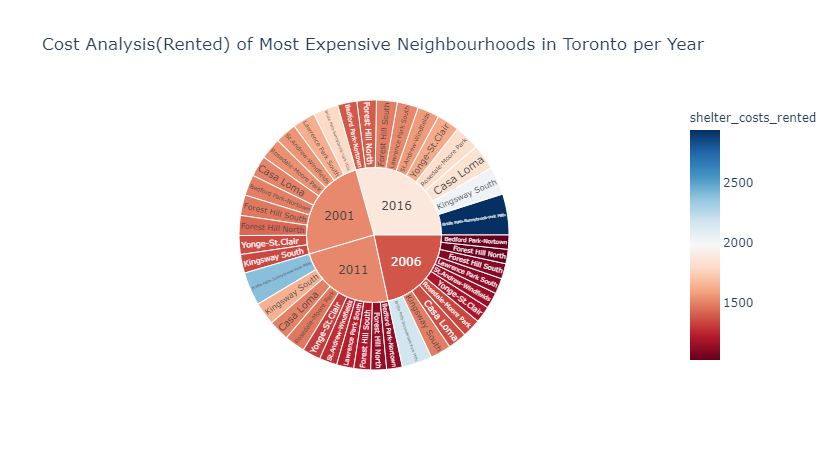

In [44]:
# Create the sunburst chart for Top 10 neighbourhood

fig = px.sunburst(new_df_cost_rent, 
                  path=['year','neighbourhood'], 
                  values='shelter_costs_rented',
                  color='shelter_costs_rented', 
                  title = "Cost Analysis(Rented) of Most Expensive Neighbourhoods in Toronto per Year",
                  color_continuous_scale='RdBu',
                  
                 )
fig.show()